# Import

In [0]:
%pip install --upgrade nltk 
%pip install --upgrade textblob
%pip install --upgrade wordcloud 
%pip install --upgrade pip
%pip install --upgrade pillow 

Python interpreter will be restarted.
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8
    Not uninstalling nltk at /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-a109335f-014a-40fc-bfe5-6ac128223a2e
    Can't uninstall 'nltk'. No files were found to uninstall.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Python interpreter will be restarted.
Python interpreter will be restarted.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found e

In [0]:
import string
from itertools import chain
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from pyspark.ml.feature import *
from pyspark.ml.feature import Tokenizer
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import sparknlp
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

from textblob import Word
from wordcloud import WordCloud
import string
from collections import Counter

spark = sparknlp.start()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.getOrCreate()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
meta_industries_12 = {
    'Furniture and Home Furnishings Manufacturing': 'Manufacturing',
    'Investment Banking': 'Financial and Investment',
    'Architecture and Planning': 'Services',
    'Wholesale': 'Services',
    'Travel Arrangements': 'Services',
    'Ranching': 'Miscellaneous',
    'Hospitals and Health Care': 'Healthcare and Medical',
    'Book and Periodical Publishing': 'Services',
    'Printing Services': 'Services',
    'Professional Training and Coaching': 'Services',
    'Computers and Electronics Manufacturing': 'Manufacturing',
    'Shipbuilding': 'Manufacturing',
    'Public Policy Offices': 'Government and Public Policy',
    'Software Development': 'Technology',
    'Outsourcing and Offshoring Consulting': 'Services',
    'Retail Groceries': 'Retail and Consumer Goods',
    'Education Administration Programs': 'Education and Training',
    'Plastics Manufacturing': 'Manufacturing',
    'Renewable Energy Semiconductor Manufacturing': 'Manufacturing',
    'Computer Networking Products': 'Technology',
    'Events Services': 'Services',
    'Information Services': 'Services',
    'Food and Beverage Services': 'Services',
    'Semiconductor Manufacturing': 'Manufacturing',
    'Business Consulting and Services': 'Services',
    'Insurance': 'Services',
    'Financial Services': 'Services',
    'Wireless Services': 'Services',
    'Computer Hardware Manufacturing': 'Technology',
    'Public Safety': 'Services',
    'Maritime Transportation': 'Transportation and Logistics',
    'Tobacco Manufacturing': 'Manufacturing',
    'Writing and Editing': 'Services',
    'Veterinary Services': 'Services',
    'Staffing and Recruiting': 'Services',
    'Accounting': 'Services',
    'International Affairs': 'Government and Public Policy',
    'Spectator Sports': 'Miscellaneous',
    'Glass, Ceramics and Concrete Manufacturing': 'Manufacturing',
    'Chemical Manufacturing': 'Manufacturing',
    'Mining': 'Miscellaneous',
    'E-Learning Providers': 'Technology',
    'Security and Investigations': 'Services',
    'Translation and Localization': 'Services',
    'Automation Machinery Manufacturing': 'Technology',
    'Computer and Network Security': 'Technology',
    'Political Organizations': 'Government and Public Policy',
    'Environmental Services': 'Government and Public Policy',
    'Oil and Gas': 'Miscellaneous',
    'Real Estate': 'Real Estate and Construction',
    'Think Tanks': 'Government and Public Policy',
    'Executive Offices': 'Miscellaneous',
    'Law Practice': 'Services',
    'Nanotechnology Research': 'Miscellaneous',
    'International Trade and Development': 'Government and Public Policy',
    'Personal Care Product Manufacturing': 'Manufacturing',
    'Philanthropic Fundraising Services': 'Services',
    'Entertainment Providers': 'Media and Entertainment',
    'Market Research': 'Media and Entertainment',
    'Movies, Videos, and Sound': 'Media and Entertainment',
    'Sporting Goods Manufacturing': 'Manufacturing',
    'Graphic Design': 'Services',
    'Technology, Information and Internet': 'Technology',
    'IT Services and IT Consulting': 'Technology',
    'Retail Office Equipment': 'Retail and Consumer Goods',
    'Wholesale Import and Export': 'Services',
    'Capital Markets': 'Financial and Investment',
    'Law Enforcement': 'Services',
    'Freight and Package Transportation': 'Transportation and Logistics',
    'Industrial Machinery Manufacturing': 'Manufacturing',
    'Non-profit Organizations': 'Miscellaneous',
    'Retail Art Supplies': 'Retail and Consumer Goods',
    'Animation and Post-production': 'Media and Entertainment',
    'Transportation, Logistics, Supply Chain and Storage': 'Transportation and Logistics',
    'Aviation and Aerospace Component Manufacturing': 'Transportation and Logistics',
    'Fundraising': 'Financial and Investment',
    'Railroad Equipment Manufacturing': 'Transportation and Logistics',
    'Construction': 'Real Estate and Construction',
    'Investment Management': 'Financial and Investment',
    'Utilities': 'Miscellaneous',
    'Retail Luxury Goods and Jewelry': 'Retail and Consumer Goods',
    'Warehousing and Storage': 'Transportation and Logistics',
    'Media Production': 'Media and Entertainment',
    'Gambling Facilities and Casinos': 'Media and Entertainment',
    'Defense and Space Manufacturing': 'Manufacturing',
    'Facilities Services': 'Services',
    'Government Relations Services': 'Government and Public Policy',
    'Advertising Services': 'Media and Entertainment',
    'Paper and Forest Product Manufacturing': 'Manufacturing',
    'Packaging and Containers Manufacturing': 'Manufacturing',
    'Telecommunications': 'Technology',
    'Medical Equipment Manufacturing': 'Healthcare and Medical',
    'Beverage Manufacturing': 'Manufacturing',
    'Restaurants': 'Retail and Consumer Goods',
    'Leasing Non-residential Real Estate': 'Real Estate and Construction',
    'Newspaper Publishing': 'Media and Entertainment',
    'Armed Forces': 'Miscellaneous',
    'Appliances, Electrical, and Electronics Manufacturing': 'Manufacturing',
    'Hospitality': 'Services',
    'Pharmaceutical Manufacturing': 'Healthcare and Medical',
    'Research Services': 'Services',
    'Retail Apparel and Fashion': 'Retail and Consumer Goods',
    'Photography': 'Media and Entertainment',
    'Wellness and Fitness Services': 'Services',
    'Truck Transportation': 'Transportation and Logistics',
    'Consumer Services': 'Services',
    'Wholesale Building Materials': 'Services',
    'Human Resources Services': 'Services',
    'Airlines and Aviation': 'Transportation and Logistics',
    'Machinery Manufacturing': 'Manufacturing',
    'Individual and Family Services': 'Services',
    'Motor Vehicle Manufacturing': 'Manufacturing',
    'Performing Arts': 'Media and Entertainment',
    'Museums, Historical Sites, and Zoos': 'Media and Entertainment',
    'Broadcast Media Production and Distribution': 'Media and Entertainment',
    'Banking': 'Financial and Investment',
    'Recreational Facilities': 'Miscellaneous',
    'Government Administration': 'Government and Public Policy',
    'Public Relations and Communications Services': 'Media and Entertainment',
    'Fisheries': 'Miscellaneous',
    'Medical Practices': 'Healthcare and Medical',
    'Religious Institutions': 'Miscellaneous',
    'Online Audio and Video Media': 'Media and Entertainment',
    'Artists and Writers': 'Miscellaneous',
    'Biotechnology Research': 'Healthcare and Medical',
    'Legal Services': 'Services',
    'Retail': 'Retail and Consumer Goods',
    'Civil Engineering': 'Services',
    'Libraries': 'Miscellaneous',
    'Alternative Dispute Resolution': 'Miscellaneous',
    'Manufacturing': 'Miscellaneous',
    'Design Services': 'Services',
    'Dairy Product Manufacturing': 'Manufacturing',
    'Higher Education': 'Education and Training',
    'Civic and Social Organizations': 'Miscellaneous',
    'Textile Manufacturing': 'Manufacturing',
    'Venture Capital and Private Equity Principals': 'Financial and Investment',
    'Mental Health Care': 'Healthcare and Medical',
    'Musicians': 'Media and Entertainment',
    'Farming': 'Miscellaneous',
    'Computer Games': 'Media and Entertainment',
    'Strategic Management Services': 'Services',
    'Food and Beverage Manufacturing': 'Manufacturing',
    'Primary and Secondary Education': 'Education and Training',
    'Alternative Medicine': 'Healthcare and Medical',
    'Legislative Offices': 'Services',
    'Administration of Justice': 'Services',
    'Mobile Gaming Apps': 'Media and Entertainment'
}

In [0]:
# create world cloud plot
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def add_number_of_similar_companies(companies):
    # creates new columns based on existing columns to provide additional information
    companies = companies.withColumn('number_of_similar_companies', size(col('similar')))
    return companies

# Upload new & old companies trend and merge the linkedin companies data

In [0]:
companies = spark.read.parquet('/linkedin/companies')
companies = add_number_of_similar_companies(companies)

# upload companies trend
old_companies_trend_df = pd.read_csv("/dbfs/FileStore/shared_uploads/omriitzhaki@campus.technion.ac.il/final_old_companies_trend_preprocess")
new_companies_trend_df = pd.read_csv("/dbfs/FileStore/shared_uploads/omriitzhaki@campus.technion.ac.il/final_new_companies_trend_preprocess")
old_companies = spark.createDataFrame(old_companies_trend_df)
new_companies = spark.createDataFrame(new_companies_trend_df)

# merge with linkedin companies data
old_companies = companies.join(old_companies, 'name', 'inner')
new_companies = companies.join(new_companies, 'name', 'inner')

# Filter companies that contain & in thier name
old_companies = old_companies.filter(~col("search_name").contains("&"))
new_companies = new_companies.filter(~col("search_name").contains("&"))

# filter old & new companies according to our definition
old_companies = old_companies.filter(col('founded') >= '1900').filter(col('founded') < '2020')
new_companies = new_companies.filter(col('founded') >= '2020').filter(col('founded') < '2025')

# add meta_industry column
meta_industry = udf(lambda x: meta_industries_12[x] )

old_companies = old_companies.filter(old_companies.industries.isNotNull())
old_companies = old_companies.withColumn('meta_industry', meta_industry(col('industries')))

new_companies = new_companies.filter(new_companies.industries.isNotNull())
new_companies = new_companies.withColumn('meta_industry', meta_industry(col('industries')))

In [0]:
old_companies_df = old_companies.select('*')
new_companies_df = new_companies.select('*')

old_companies = old_companies.toPandas()
new_companies = new_companies.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field affiliated. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: ArrayType(StructType([StructField('Links', StringType(), True), StructField('location', StringType(), True), StructField('subtitle', StringType(), True), StructField('title', StringType(), True)]), True)
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field af

In [0]:
old_companies['state'] = old_companies['headquarters'].apply(lambda x: x.split(',')[-1])
new_companies['state'] = new_companies['headquarters'].apply(lambda x: x.split(',')[-1])

# Feature Distributions

# Stability Features

In [0]:
old_companies.columns

Out[87]: Index(['name', 'about', 'affiliated', 'company_id', 'company_size',
       'country_code', 'crunchbase_url', 'employees', 'employees_in_linkedin',
       'followers', 'formatted_locations', 'founded', 'funding',
       'headquarters', 'id', 'image', 'industries', 'investors', 'locations',
       'logo', 'organization_type', 'similar', 'slogan', 'specialties',
       'sphere', 'stock_info', 'timestamp', 'type', 'updates', 'url',
       'website', 'number_of_similar_companies', 'Unnamed: 0', 'search_name',
       'dates', 'scores', 'index_to_drop', '12_month_moving_std', 'stability',
       '12_month_moving_mean', 'popularity', 'meta_industry', 'state',
       'popularity_category'],
      dtype='object')

In [0]:
old_companies[['id', 'company_size', 'organization_type', 'meta_industry', 'state', 'about', 'slogan', 'specialties', 'number_of_similar_companies']].head(10)

,id,company_size,organization_type,meta_industry,state,about,slogan,specialties,number_of_similar_companies
0,'47-brand,201-500 employees,Privately Held,Retail and Consumer Goods,Massachusetts,'47 is a sports lifestyle brand established in...,"Sports lifestyle brand based out of Boston, MA...","Sports Licensing, Headwear, Apparel, Lifestyle...",10
1,scope-student-committee-on-popular-entertainment,11-50 employees,Educational,Media and Entertainment,New Hampshire,The Student Committee on Popular Entertainment...,None,None,10
2,1-sound,2-10 employees,Privately Held,Manufacturing,New Jersey,"1 SOUND is a professional loudspeaker company,...","Premium speaker technology, manufactured in th...",None,10
3,1800-striper-franchise,11-50 employees,Privately Held,Services,New York,"Established in 1999, our company has refined t...",Visit 1800striper.com or call (585) 663-6609. ...,Parking Lot Striping,10
4,32-bar-blues,2-10 employees,Privately Held,Retail and Consumer Goods,CA,Men's direct-to-consumer catalog and internet ...,None,None,10
5,3vr,51-200 employees,Privately Held,Services,CA,3VR provides video intelligence solutions for ...,None,"Video Management Software, Video Intelligence,...",10
6,80-20-inc--columbia-city,201-500 employees,Privately Held,Services,IN,80/20® is the leader in the modular T-slot alu...,Helping build your innovative solutions with m...,"Modular Aluminum Framing Systems, T-slotted Al...",10
7,88-tactical-omaha,51-200 employees,Partnership,Services,Nebraska,88 Tactical is a multifaceted organization kno...,Discover Your Confidence with 88 Tactical,"Self-Defense Training, Elite Tactical Training...",10
8,a-design-consulting,2-10 employees,Privately Held,Services,CA,AD+C began in 2018 as an Architectural Design ...,Modernizing the planning and design of complex...,"Master Planning, Medical Planning, Concept Des...",10
9,a-1-property-services-group-inc,51-200 employees,Privately Held,Real Estate and Construction,Florida,We know that choosing a roofer for your home o...,ROOFING THE FUTURE,None,3


## Company size

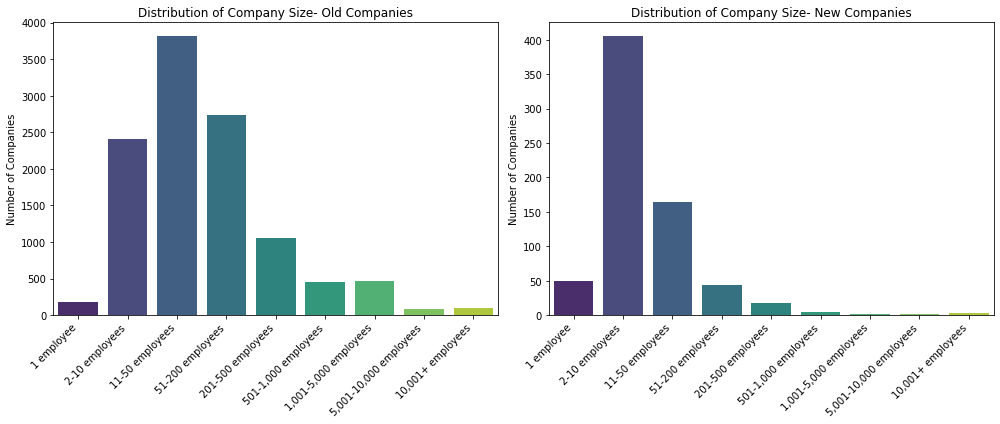

In [0]:
desired_order = ['1 employee',
                '2-10 employees',
                '11-50 employees',
                '51-200 employees',
                '201-500 employees',
                '501-1,000 employees',
                '1,001-5,000 employees',
                '5,001-10,000 employees',
                '10,001+ employees',
]       

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for old companies
sns.countplot(data=old_companies, x='company_size', order=desired_order, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Company Size- Old Companies')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Companies')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') 

# Plot for new companies
sns.countplot(data=new_companies, x='company_size', order=desired_order, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Company Size- New Companies')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Companies')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()
plt.show()

## 

## Meta Industry

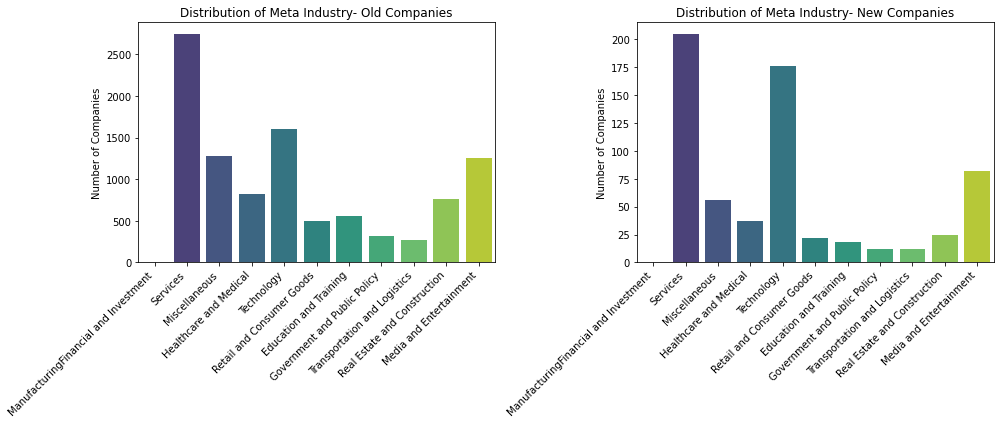

In [0]:
desired_order = ['Manufacturing'
                'Financial and Investment',
                'Services',
                'Miscellaneous',
                'Healthcare and Medical',
                'Technology',
                'Retail and Consumer Goods',
                'Education and Training',
                'Government and Public Policy',
                'Transportation and Logistics',
                'Real Estate and Construction',
                'Media and Entertainment'] 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for old companies
sns.countplot(data=old_companies, x='meta_industry', order=desired_order, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Meta Industry- Old Companies')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Companies')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') 

# Plot for new companies
sns.countplot(data=new_companies, x='meta_industry', order=desired_order, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Meta Industry- New Companies')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Companies')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()
plt.show()

## Organization Type

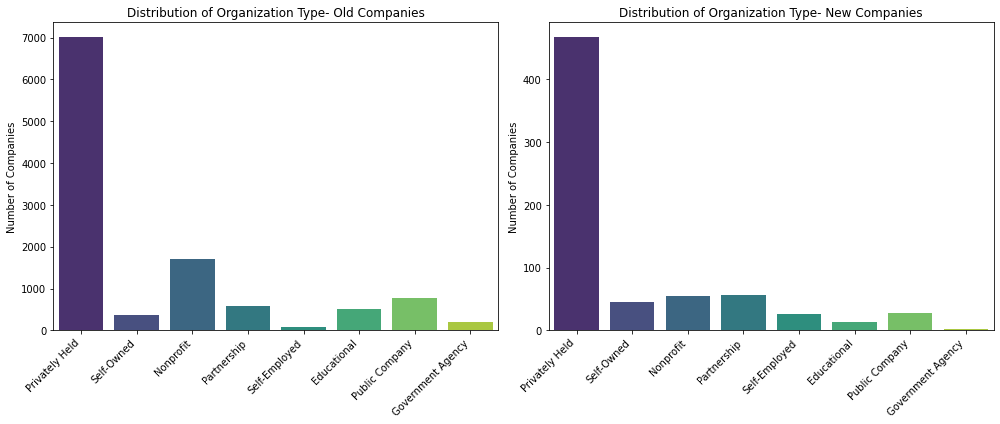

In [0]:
desired_order = ['Privately Held',
                          'Self-Owned',
                          'Nonprofit',
                          'Partnership',
                          'Self-Employed',
                          'Educational',
                          'Public Company',
                          'Government Agency',
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for old companies
sns.countplot(data=old_companies, x='organization_type', order=desired_order, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Organization Type- Old Companies')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Companies')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') 

# Plot for new companies
sns.countplot(data=new_companies, x='organization_type', order=desired_order, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Organization Type- New Companies')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Companies')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()
plt.show()

## State

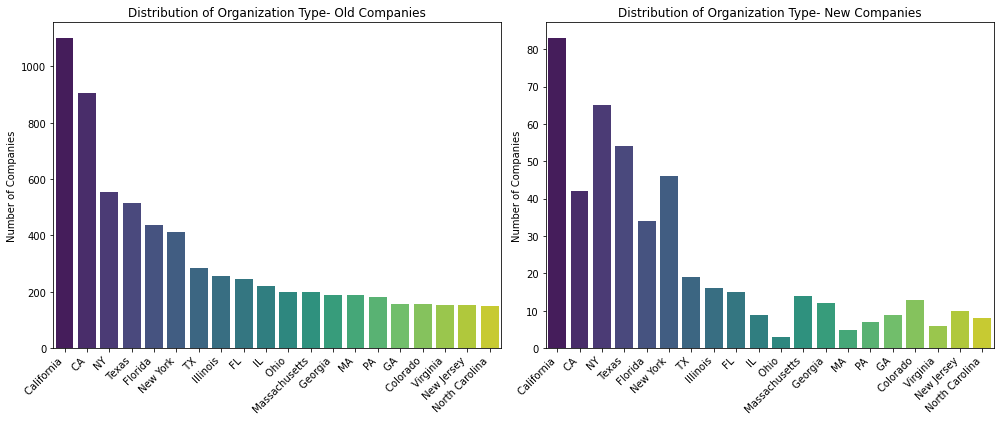

In [0]:
top_states = old_companies['state'].value_counts().head(20)
top_states_names = top_states.index.tolist()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for old companies
sns.countplot(data=old_companies, x='state', order=top_states_names, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of State- Old Companies')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Companies')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') 

# Plot for new companies
sns.countplot(data=new_companies, x='state', order=top_states_names, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of State- New Companies')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Companies')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()
plt.show()


# About

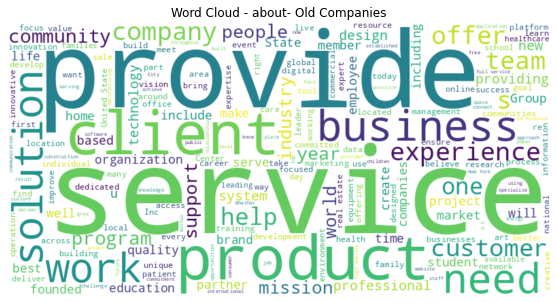

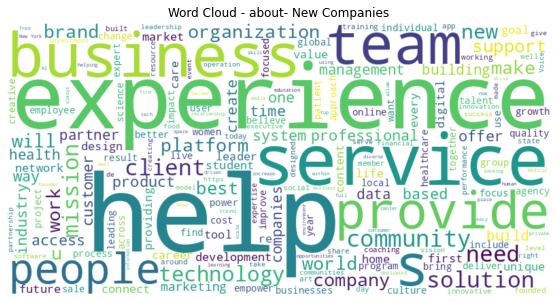

In [0]:
column = 'about'
# convert 'about' section to text
about_text = " ".join(old_companies_df.filter(col(column).isNotNull()).select(column).rdd.flatMap(lambda x: x).collect())

# create word clouds plot
generate_word_cloud(about_text, f"Word Cloud - {column}- Old Companies")

about_text = " ".join(new_companies_df.filter(col(column).isNotNull()).select(column).rdd.flatMap(lambda x: x).collect())

# create word clouds plot
generate_word_cloud(about_text, f"Word Cloud - {column}- New Companies")

# Slogan

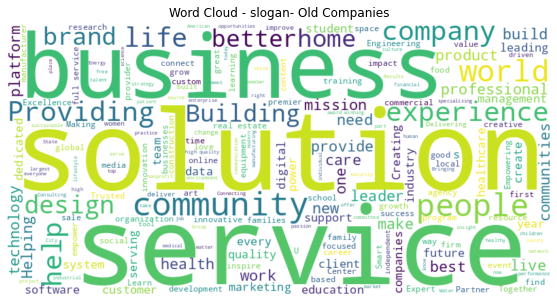

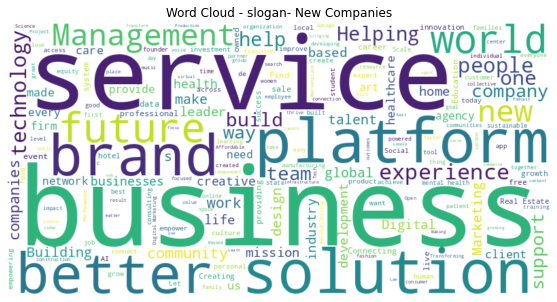

In [0]:
column = 'slogan'
# convert 'about' section to text
slogan_text = " ".join(old_companies_df.filter(col(column).isNotNull()).select(column).rdd.flatMap(lambda x: x).collect())

# create word clouds plot
generate_word_cloud(slogan_text, f"Word Cloud - {column}- Old Companies")

slogan_text = " ".join(new_companies_df.filter(col(column).isNotNull()).select(column).rdd.flatMap(lambda x: x).collect())

# create word clouds plot
generate_word_cloud(slogan_text, f"Word Cloud - {column}- New Companies")

# Specialties

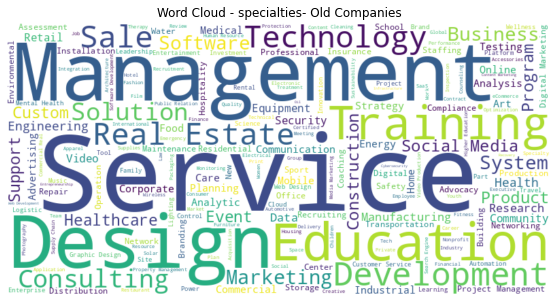

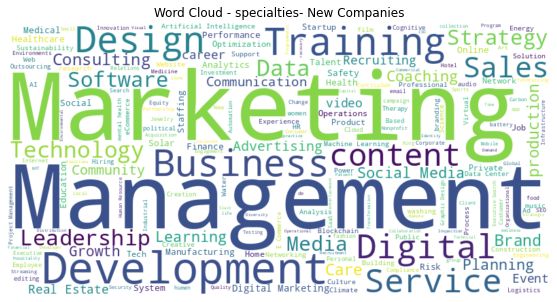

In [0]:
column = 'specialties'
# convert 'about' section to text
specialties_text = " ".join(old_companies_df.filter(col(column).isNotNull()).select(column).rdd.flatMap(lambda x: x).collect())

# create word clouds plot
generate_word_cloud(specialties_text, f"Word Cloud - {column}- Old Companies")

specialties_text = " ".join(new_companies_df.filter(col(column).isNotNull()).select(column).rdd.flatMap(lambda x: x).collect())

# create word clouds plot
generate_word_cloud(specialties_text, f"Word Cloud - {column}- New Companies")

# Popularity Features

In [0]:
popularity_quantiles = old_companies['popularity'].quantile([0.3, 0.7])
old_companies['popularity_category'] = "Neutral Popularity"
old_companies.loc[old_companies['popularity'] < popularity_quantiles[0.3], 'popularity_category'] = "Unpopular"
old_companies.loc[old_companies['popularity'] > popularity_quantiles[0.7], 'popularity_category'] = "Very Popular"

In [0]:
old_companies[['id', 'number_of_similar_companies', 'company_size', 'organization_type', 'meta_industry', 'stability', 'specialties', 'popularity_category']].head(10)

,id,number_of_similar_companies,company_size,organization_type,meta_industry,stability,specialties,popularity_category
0,'47-brand,10,201-500 employees,Privately Held,Retail and Consumer Goods,5.674002,"Sports Licensing, Headwear, Apparel, Lifestyle...",Very Popular
1,scope-student-committee-on-popular-entertainment,10,11-50 employees,Educational,Media and Entertainment,5.023785,None,Very Popular
2,1-sound,10,2-10 employees,Privately Held,Manufacturing,9.280287,None,Very Popular
3,1800-striper-franchise,10,11-50 employees,Privately Held,Services,3.534991,Parking Lot Striping,Very Popular
4,32-bar-blues,10,2-10 employees,Privately Held,Retail and Consumer Goods,19.485231,None,Neutral Popularity
5,3vr,10,51-200 employees,Privately Held,Services,10.845746,"Video Management Software, Video Intelligence,...",Neutral Popularity
6,80-20-inc--columbia-city,10,201-500 employees,Privately Held,Services,5.163610,"Modular Aluminum Framing Systems, T-slotted Al...",Neutral Popularity
7,88-tactical-omaha,10,51-200 employees,Partnership,Services,7.941071,"Self-Defense Training, Elite Tactical Training...",Neutral Popularity
8,a-design-consulting,10,2-10 employees,Privately Held,Services,13.327814,"Master Planning, Medical Planning, Concept Des...",Very Popular
9,a-1-property-services-group-inc,3,51-200 employees,Privately Held,Real Estate and Construction,3.659736,None,Very Popular


In [0]:
# 'company_size', 'organization_type', 'meta_industry', 'specialties' were presented in the previous section

## stability

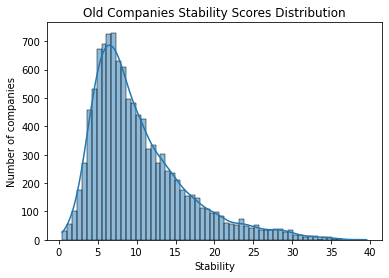

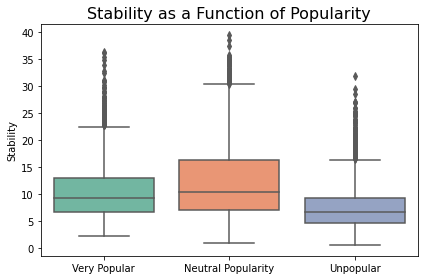

In [0]:
sns.histplot(data=old_companies, x='stability', kde=True)
plt.title('Old Companies Stability Scores Distribution')
plt.xlabel('Stability')
plt.ylabel('Number of companies')
plt.show()

sns.boxplot(data=old_companies, x='popularity_category', y='stability', palette='Set2')
plt.title('Stability as a Function of Popularity', fontsize=16)
plt.xlabel('')
plt.ylabel('Stability')
plt.tight_layout()
plt.show()

## Popularity Category

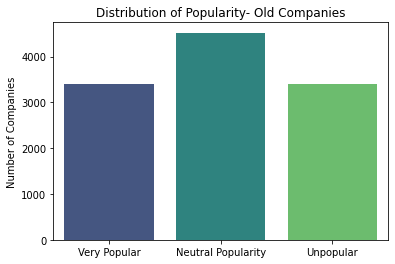

In [0]:
sns.countplot(data=old_companies, x='popularity_category', palette='viridis')
plt.title('Distribution of Popularity- Old Companies')
plt.xlabel('')
plt.ylabel('Number of Companies')
plt.show()

# Not Relevant Features

In [0]:
old_companies.columns

Out[25]: Index(['name', 'about', 'affiliated', 'company_id', 'company_size',
       'country_code', 'crunchbase_url', 'employees', 'employees_in_linkedin',
       'followers', 'formatted_locations', 'founded', 'funding',
       'headquarters', 'id', 'image', 'industries', 'investors', 'locations',
       'logo', 'organization_type', 'similar', 'slogan', 'specialties',
       'sphere', 'stock_info', 'timestamp', 'type', 'updates', 'url',
       'website', 'Unnamed: 0', 'search_name', 'dates', 'scores',
       'index_to_drop', '12_month_moving_std', 'stability',
       '12_month_moving_mean', 'popularity', 'meta_industry', 'state'],
      dtype='object')

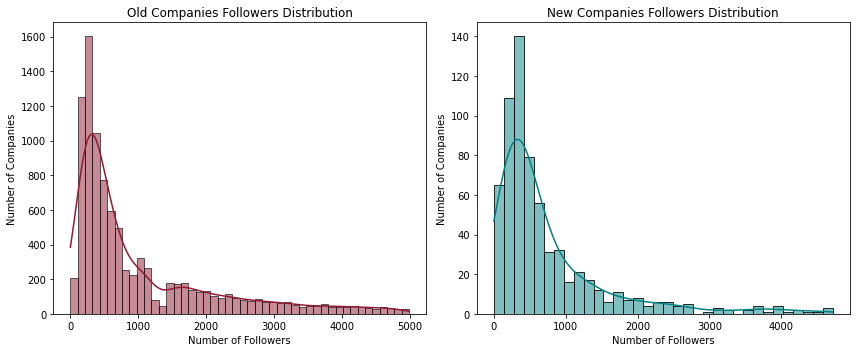

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for old companies
sns.histplot(data=old_companies[old_companies['followers'] < 5000], x='followers', kde=True, color=(145/255, 25/255, 51/255), ax=axes[0])
axes[0].set_title('Old Companies Followers Distribution')
axes[0].set_xlabel('Number of Followers')
axes[0].set_ylabel('Number of Companies')

# Plot for new companies
sns.histplot(data=new_companies[new_companies['followers'] < 5000], x='followers', kde=True, color='teal', ax=axes[1])
axes[1].set_title('New Companies Followers Distribution')
axes[1].set_xlabel('Number of Followers')
axes[1].set_ylabel('Number of Companies')

plt.tight_layout()
plt.show()

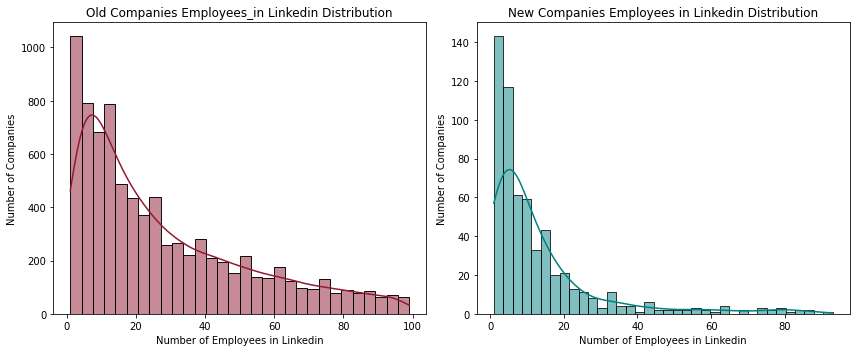

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for old companies
sns.histplot(data=old_companies[old_companies['employees_in_linkedin'] < 100], x='employees_in_linkedin', kde=True, color=(145/255, 25/255, 51/255), ax=axes[0])
axes[0].set_title('Old Companies Employees_in Linkedin Distribution')
axes[0].set_xlabel('Number of Employees in Linkedin')
axes[0].set_ylabel('Number of Companies')

# Plot for new companies
sns.histplot(data=new_companies[new_companies['employees_in_linkedin'] < 100], x='employees_in_linkedin', kde=True, color='teal', ax=axes[1])
axes[1].set_title('New Companies Employees in Linkedin Distribution')
axes[1].set_xlabel('Number of Employees in Linkedin')
axes[1].set_ylabel('Number of Companies')

plt.tight_layout()
plt.show()

In [0]:
from pyspark.sql.functions import col, sum
def show_null_precentage(companies, fetures):
    #display the percentage of null values in specified columns
    null_counts = companies.select([sum(col(column).isNull().cast("int")).alias(column) for column in fetures])
    total_rows = companies.count()
    null_percentage = null_counts.select([(col(column) / total_rows * 100).alias(column + "_null_percentage") for column in fetures])
    null_percentage.display()

def replace_empty_lists_with_null(companies, columns):
    # replace all the empty lists values in columns with None 
    for column in columns:
        companies = companies.withColumn(column, when(size(col(column)) == 0, None).otherwise(col(column)))
    return companies

def value_count(companies, column):
    # return the value count of given column
    count_df = companies.groupBy(column).count().orderBy("count", ascending=False)
    return count_df

def display_distinct_count (companies, columns):
    # display the distinct count of values in columns and shows the value counts after filtering out null values
    for column in columns:
        print(f"distinct count of column '{column}': {companies.select(column).distinct().count()}")
        value_count_df = value_count(companies, column)
        value_count_df = value_count_df.filter(value_count_df[column].isNotNull())
        value_count_df.limit(3).display()

## Columns with Excessive Missing Values

In [0]:
companies = spark.read.parquet('/linkedin/companies')

companies_without_empty_lists = replace_empty_lists_with_null(companies, ['affiliated', 'updates'])
show_null_precentage(companies_without_empty_lists, companies.select('affiliated', 'crunchbase_url', 'stock_info', 'investors', 'funding', 'type','updates').columns)

affiliated_null_percentage,crunchbase_url_null_percentage,stock_info_null_percentage,investors_null_percentage,funding_null_percentage,type_null_percentage,updates_null_percentage
99.38283535880382,99.60746332751616,99.98980880617545,99.8267497049825,99.60746332751616,83.45413997920997,94.78021109125196


## Overly Common Values

In [0]:
for column in ['country_code', 'image', 'timestamp']:
    print(f"{column} value counts:")
    value_count(companies, column).limit(3).display()

country_code value counts:


country_code,count
US,1422797


image value counts:


image,count
https://static.licdn.com/aero-v1/sc/h/5q92mjc5c51bjlwaj3rs9aa82,1261395
https://media.licdn.com/dms/image/C511BAQF0OjrsfiLXSw/company-background_10000/0/1519796601636?e=1693378800&v=beta&t=0hM3DxWpiZ9nubjyKwV98wD8-PPr91Qbr0vaO3Ughco,1
https://media.licdn.com/dms/image/C561BAQHxxGI3KecHJg/company-background_10000/0/1558652177905?e=1693364400&v=beta&t=504EFEmR64H_0zlarPqD56KRe6rbgTuXMK6jyR5b41Y,1


timestamp value counts:


timestamp,count
2023-08-23,1364242
2023-08-24,58555


## Rare or Distinct Values

In [0]:
display_distinct_count(companies, ['company_id', 'url', 'website'])

distinct count of column 'company_id': 1422797


company_id,count
15306243,1
12638266,1
12580586,1


distinct count of column 'url': 1422797


url,count
https://www.linkedin.com/company/5-01-5-17-48th-avenue-ii-llc,1
https://www.linkedin.com/company/melvin-f.-gorelick-m.d,1
https://www.linkedin.com/company/bigbenmarketingconsulting,1


distinct count of column 'website': 553618


website,count
https://www.facebook.com/nate323,108
https://www.servicemasterclean.com/,39
http://none/,19
